## Homework 5
### Carlos Lizama

#### Descrition of the Problem:

In this homework I replicate what I did in homework 4 but this time in Julia. Consider the following AR(1) process:

 $$ X_{t+1} = \alpha X_t + \beta + \sigma W_{t+1}, \quad   \{ W_{t} \} \sim N(0,1) $$

The aim is to estimate the bias of the OLS estimator of $\alpha$ for different sample sizes $n$. Furthermore, in order to obtain a good estimate of the bias, 10,000 estimates are obtained for each pair $(\alpha, n)$ and the final estimate is the average of these.

I start first including the necessary packages.

In [1]:
using PyPlot
using Distributions

Then I define the function that is going to do most of the job, ie., generating the data as well as the estimation

In [2]:
function estimate_bias(alphas,beta,sigma,ns,N)
    # alphas is a vector with the different alpha's to be considered.
    # beta is the constant in the AR(1) process
    # sigma is the standard deviation of the innovations.
    # ns is a vector with the different sample sizes n to be considered.
    # N is the number of estimate to compute for each pair (alpha, n)

    n_alphas = length(alphas)
    alphas = reshape(alphas,n_alphas,1)  # ensure that alphas is a column vector
    n_ns = length(ns)
    results = zeros(n_alphas,n_ns)
    place_n = 1                          # counter for place of 'n' in array ns.
    
    
    # fix one n, simulate and estimate, and then change n.
    for n in ns
        
        estimates = zeros(n_alphas,N)   # for a given n, this array will store the estimator 
                                        # of each of the N estimators
        for i in 1:N
            
            x = zeros(n_alphas,n)       # This array stores the generated process, each row is a particular alpha.
            x[:,1] = beta./(1-alphas)
            
            for t in 1:n-1
                x[:,t+1] = alphas.*x[:,t] + beta + sigma*randn(n_alphas,1)
            end
            
            # estimate alpha from the data generated.
            for a in 1:n_alphas
                cons, alpha_hat = linreg(squeeze(x[a,1:end-1],1),squeeze(x[a,2:end],1))
                estimates[a,i] = alpha_hat
            end
            
        end
    
        results[:,place_n] = mean(estimates,2) - alphas
        place_n += 1
        
    end
    
    return results
    
end

estimate_bias (generic function with 1 method)

Then I call the function to generate the data and compute the estimators for all pairs $(\alpha,n)$

In [3]:
# Define parameters of the problem
alphas = [.6, .7, .8, .9]
beta = 1
sigma = 1
ns = 50:50:500
N = 10000

# Call the funciton
@time bias = estimate_bias(alphas,beta,sigma,ns,N)

126.

4x10 Array{Float64,2}:
 -0.0603142  -0.0282222  -0.0181021  -0.01396    …  -0.00617425  -0.00618298
 -0.0661123  -0.0326207  -0.021473   -0.0155347     -0.00693199  -0.00641161
 -0.0766263  -0.0358511  -0.0249484  -0.0181886     -0.00790042  -0.00692485
 -0.0894908  -0.0420645  -0.0270601  -0.0195073     -0.00866171  -0.00728988

233014 seconds (724.65 M allocations: 42.137 GB, 4.35% gc time)


Finally, plot the results

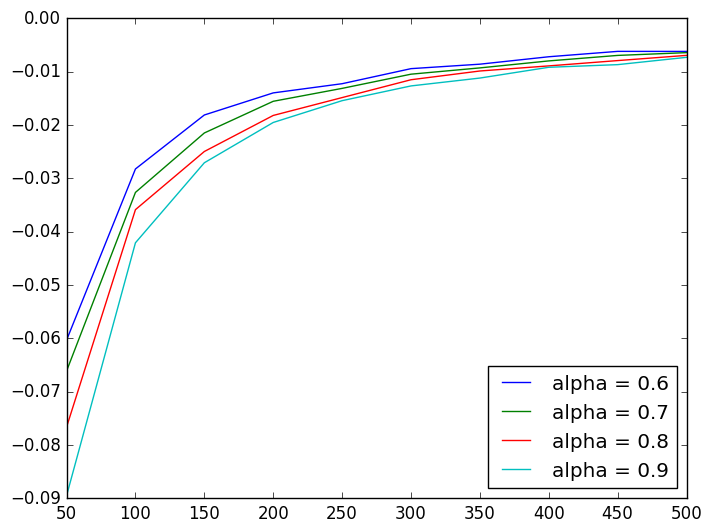

PyObject <matplotlib.legend.Legend object at 0x31f13ccc0>

In [4]:
fig, ax = subplots()
for a in 1:length(alphas)
    alpha = alphas[a]
    ax[:plot](ns, squeeze(bias[a,:],1), label="alpha = $alpha")
end
ax[:legend](loc="lower right")